In [12]:
# importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm

# turning off warnings
import warnings
warnings.filterwarnings("ignore")

In [13]:
# importing the sales data
df = pd.read_csv("data/data.csv")
df.head(5)

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.5,100,2012,No Holiday,0,0,26.6,0
1,1070,0,BURGER,1/13/13,15.5,70,2013,No Holiday,1,0,30.2,0
2,1070,0,BURGER,1/13/14,15.5,104,2014,No Holiday,0,0,28.4,0
3,1070,0,BURGER,1/13/15,14.0,116,2015,No Holiday,0,0,28.4,0
4,1070,0,BURGER,1/14/12,15.5,74,2012,No Holiday,1,0,23.0,0


### Removing Effects

Now this df consists of transactions made in all days but we know that  on holidays,weekend and school breaks the price of the food items change, so we are going to remove transactions made on those dates to remove the effect due to the holidays,weekend and school breaks so that we can determine the typical price of the product on the usual day

In [14]:
# removing transactions made on Holidays, Week-ends, School breaks
df_filtered = df[(df['HOLIDAY'] == "No Holiday") & (df['IS_SCHOOLBREAK'] == 0) & (df['IS_WEEKEND'] == 0)]

## Finding Price Elasticity 

In [15]:
# defining a function to create and find price elasticity
def create_model_and_find_elasticity(data):

    # creating an OLS model and fitting it on the data
    model = ols("QUANTITY ~ PRICE",data=data).fit()
    # getting the price elasticity
    price_elasticity = model.params[1]
    # printing the stats
    print(f"\n\nThe price elasticity of the model is {str(price_elasticity)}\n\n")
    print(model.summary())
    # plotting
    fig = plt.figure(figsize=(10,5))
    fig = sm.graphics.plot_partregress_grid(model,fig=fig)
    plt.show()

    return price_elasticity,model

In [16]:
# creating a dictionary to store the elasticities
price_elasticities={}

### 1. Burgers

Let's analyse only burgers as this is a burger cafe

In [17]:
# filtering the transactions with burger
burgers = df_filtered[df_filtered['ITEM_NAME']=="BURGER"]
print(f"\n\nThe shape of the data is {burgers.shape}\n")
burgers.head(2)



The shape of the data is (1884, 12)



,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.5,100,2012,No Holiday,0,0,26.6,0
2,1070,0,BURGER,1/13/14,15.5,104,2014,No Holiday,0,0,28.4,0


We are interested in the finding the optimal price of burger for maximum profit, So let's now plot the price vs Quantity plot for burgers

<Axes: xlabel='PRICE', ylabel='QUANTITY'>

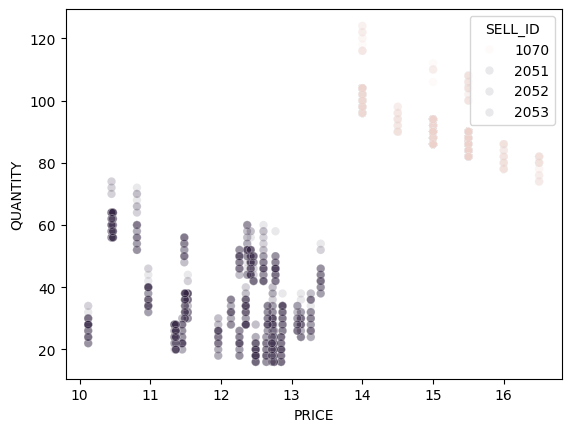

In [18]:
# doing scatterplot for Price vs Quantity for burgers based on Sell id
sns.scatterplot(x='PRICE', y='QUANTITY', data=burgers,hue="SELL_ID",alpha=0.1)


Now, we have 4 SELL_ID 1070, 2051, 2052, 2053 for burgers

1. 1070 = Burgers
2. 2051 = Burger and Coke
3. 2052 = Burger and Lemonade
4. 2053 = Burger, Coffee and coke

As we can see burgers bought under different sell_id has different distribution hence we need to model each separately

#### Burger 1070 (Burgers that are bought alone)

<Axes: xlabel='PRICE', ylabel='QUANTITY'>

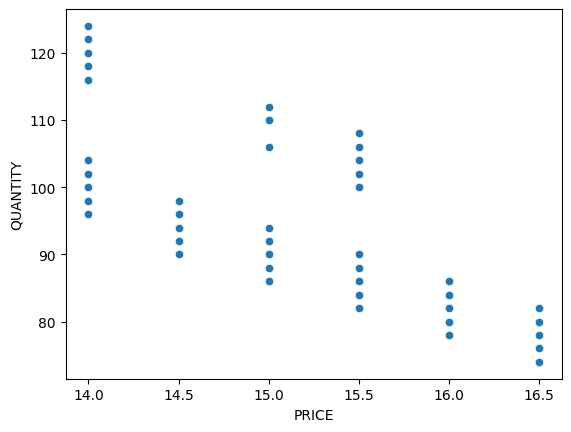

In [19]:
# filtering the burgers with sell id 1070
burgers_1070 = burgers[burgers["SELL_ID"]==1070]

# doing scatterplot for Price vs Quantity for burgers 
sns.scatterplot(x='PRICE', y='QUANTITY', data=burgers_1070)

Let's now try to fit a linear regression to find the relation between Price and Quantity (Modelling the Quantity interms of Price)



The price elasticity of the model is -9.329231941854598


                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     444.2
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           7.16e-70
Time:                        19:37:12   Log-Likelihood:                -1568.2
No. Observations:                 471   AIC:                             3140.
Df Residuals:                     469   BIC:                             3149.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

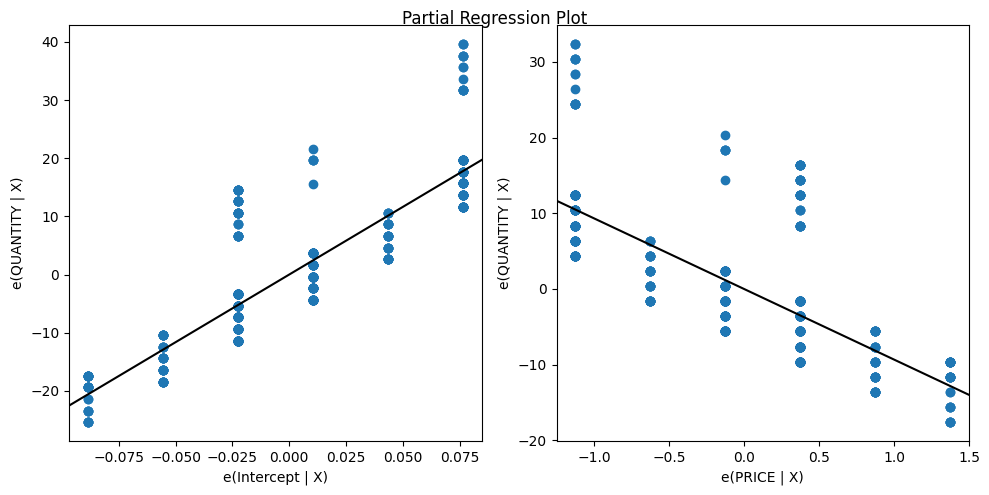

(-9.329231941854598,
 <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x233d9a77da0>)

In [20]:
# fitting a OLS regression on burgers 1070
create_model_and_find_elasticity(burgers_1070)

By seeing the report we can infer that the r2 score is 0.48 which is lesser this is because the OLS cannot fit the data properly as it has two trends this can be seen in the above plot there are two trends but we are trying to fit both the trends using the same model which results in low r2 score

Now let's filter the data further to check if we can separate these two trends, we have a feature called IS_OUTDOOR so let's try to separate the data based on this feature

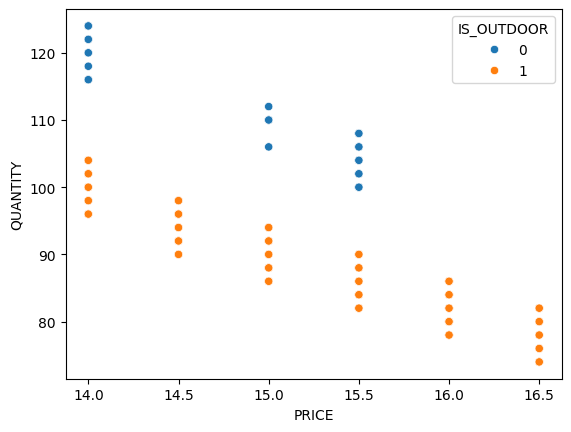

In [21]:
# doing scatterplot for Price vs Quantity for burgers based on Sell id
sns.scatterplot(x='PRICE', y='QUANTITY', hue="IS_OUTDOOR",data=burgers_1070)
plt.show()

We can clearly see that there are two different trends  so lets try to eliminate the adiitional trend due to iS_OUTDOOR (0)



The price elasticity of the model is -8.658581488470572


                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     1804.
Date:                Thu, 13 Jun 2024   Prob (F-statistic):          5.51e-153
Time:                        19:37:12   Log-Likelihood:                -1038.8
No. Observations:                 416   AIC:                             2082.
Df Residuals:                     414   BIC:                             2090.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

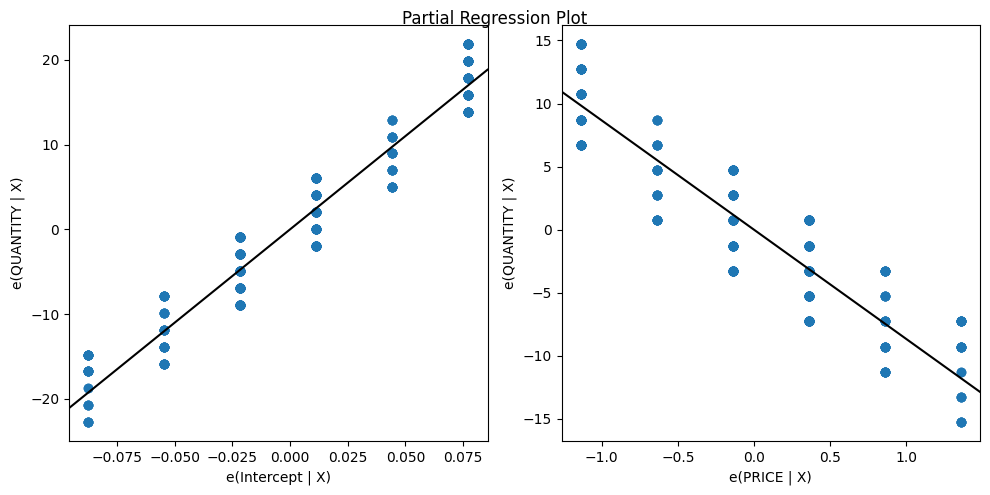

In [22]:
# filterting burger transactions with IS_OUTDOOR==1
burgers_1070_filtered = burgers_1070[burgers_1070["IS_OUTDOOR"]==1]

# modelling the filtered data using the OLS
price_elasticities["burger_1070"],burger_1070_model = create_model_and_find_elasticity(burgers_1070_filtered)

Now we can see our OLS model is now fitting well on the filtered data with a r2 score of 0.8, we can also see that the coefficient of the Price feature is -8 which denotes it's price elasticity

Now let's try to model burgers with other sell_ids

#### Burger 2051 (Burgers that are bought with coke)



The price elasticity of the model is -3.618990615456311


                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     363.3
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           1.34e-58
Time:                        19:37:13   Log-Likelihood:                -1021.5
No. Observations:                 416   AIC:                             2047.
Df Residuals:                     414   BIC:                             2055.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

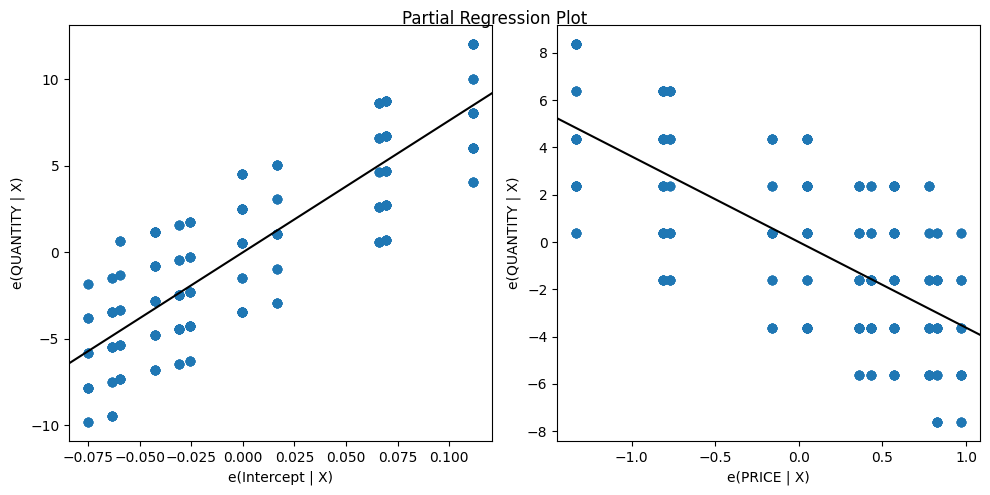

In [23]:
# filtering the burgers with sell id 1070 and outdoor == 1
burgers_2051 = burgers[(burgers["SELL_ID"]==2051) & (burgers["IS_OUTDOOR"]==1)]

# fitting the ols model
price_elasticities['burgers_2051'],burger_2051_model = create_model_and_find_elasticity(burgers_2051)

Here we can see that our model is somewhat able to model the relation with a r2 score of 0.4

#### Burger 2052 (Burgers that are bought with Lemonade )



The price elasticity of the model is -2.85670298455996


                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     316.5
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           5.32e-53
Time:                        19:37:13   Log-Likelihood:                -1014.7
No. Observations:                 416   AIC:                             2033.
Df Residuals:                     414   BIC:                             2041.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

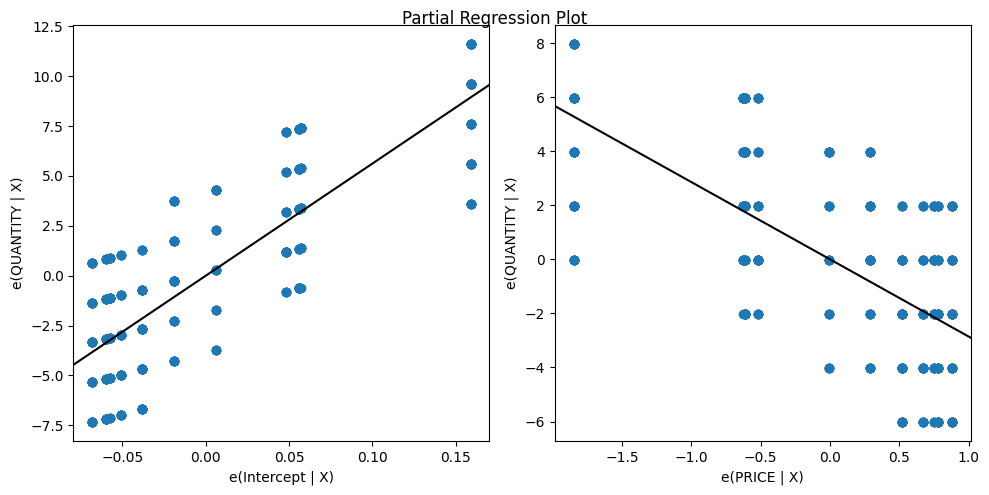

In [24]:
# filtering the rows with burger under sell id 2052
burgers_2052 = burgers[(burgers["SELL_ID"]==2052) & (burgers["IS_OUTDOOR"]==1)]

# fitting the ols model
price_elasticities['burgers_2052'],burger_2052_model = create_model_and_find_elasticity(burgers_2052)

#### Burger 2053 (Burgers that are bought with Coffee and coke )



The price elasticity of the model is -6.164156666230161


                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1784.
Date:                Thu, 13 Jun 2024   Prob (F-statistic):          3.72e-152
Time:                        19:37:13   Log-Likelihood:                -1035.7
No. Observations:                 416   AIC:                             2075.
Df Residuals:                     414   BIC:                             2083.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

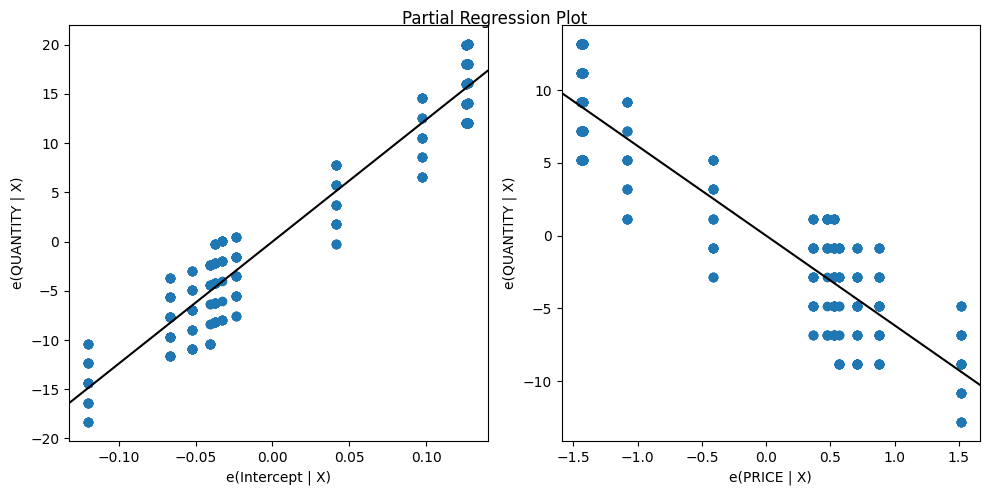

In [25]:
# filtering the rows with burger under sell id 2052
burgers_2053 = burgers[(burgers["SELL_ID"]==2053) & (burgers["IS_OUTDOOR"]==1)]

# fitting the ols model
price_elasticities['burgers_2053'],burger_2053_model = create_model_and_find_elasticity(burgers_2053)

### 2. Coke

In [26]:
# filtering the transactions with burger
coke = df_filtered[df_filtered['ITEM_NAME']=="COKE"]
print(f"\n\nThe shape of the data is {coke.shape}\n")
coke.head(5)



The shape of the data is (942, 12)



,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
1674,2051,2,COKE,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
1676,2051,2,COKE,1/13/14,13.27,38,2014,No Holiday,0,0,28.4,0
1677,2051,2,COKE,1/13/15,11.53,38,2015,No Holiday,0,0,28.4,0
1680,2051,2,COKE,1/14/14,13.27,24,2014,No Holiday,0,0,28.4,1
1681,2051,2,COKE,1/14/15,11.53,42,2015,No Holiday,0,0,30.2,0


<Axes: xlabel='PRICE', ylabel='QUANTITY'>

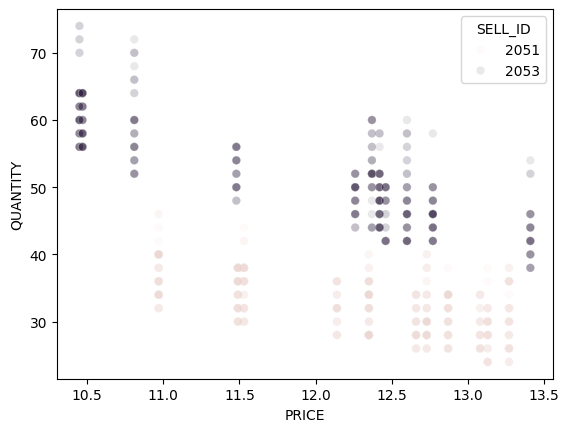

In [27]:
# doing scatterplot for Price vs Quantity for burgers based on Sell id
sns.scatterplot(x='PRICE', y='QUANTITY', data=coke,hue="SELL_ID",alpha=0.1)

Now, we have 4 SELL_ID 1070, 2051, 2052, 2053 for burgers

1. 2051 = Coke with Burger
2. 2053 = Coke with Burger and Coffee
3. 3028 = Coke that are bought alone

As we can see coke bought under different sell_id has different distribution hence we need to model each separately, We can also see that there are no cokes sold under sell id 3028 which means no coke are sold alone which is true nobody comes to a burger cafe to buy a coke alone

#### Coke 2051 (Coke that are bought with Burgers)



The price elasticity of the model is -3.618990615456311


                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     363.3
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           1.34e-58
Time:                        19:37:14   Log-Likelihood:                -1021.5
No. Observations:                 416   AIC:                             2047.
Df Residuals:                     414   BIC:                             2055.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

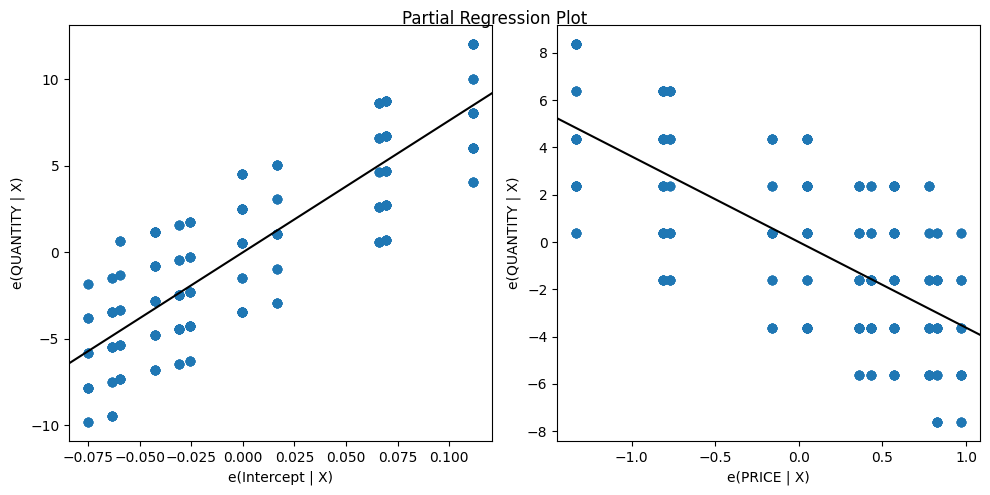

In [28]:
# filtering the rows where cokes are bought under sell id 2051
coke_2051 = coke[(coke['SELL_ID']==2051) & (coke['IS_OUTDOOR']==1)]
price_elasticities['coke_2051'],coke_2051_model = create_model_and_find_elasticity(coke_2051)

#### Coke 2053 (Coke that are bought with Burger and Coffee)



The price elasticity of the model is -6.164156666230161


                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1784.
Date:                Thu, 13 Jun 2024   Prob (F-statistic):          3.72e-152
Time:                        19:37:51   Log-Likelihood:                -1035.7
No. Observations:                 416   AIC:                             2075.
Df Residuals:                     414   BIC:                             2083.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

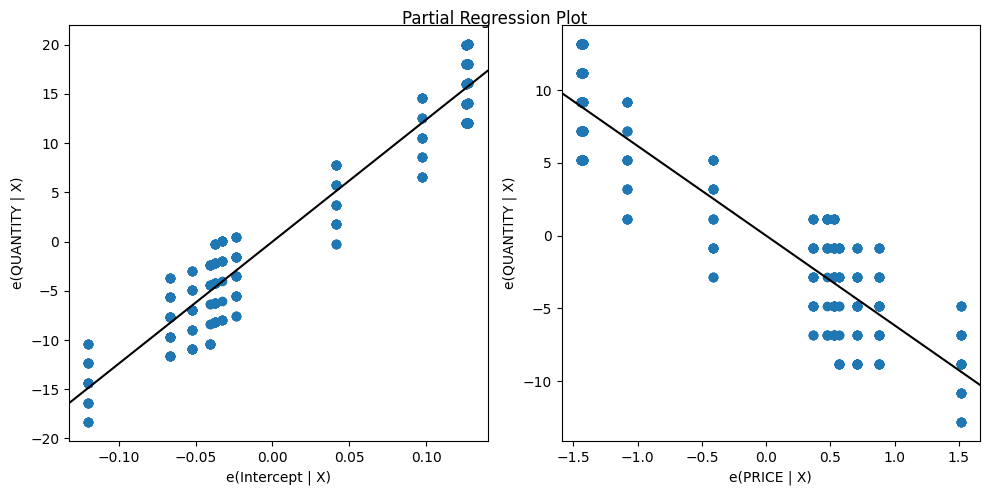

In [41]:
# filtering the rows where cokes are bought under sell id 2051
coke_2053 = coke[(coke['SELL_ID']==2053) & (coke['IS_OUTDOOR']==1)]
price_elasticities['coke_2053'],coke_2053_model = create_model_and_find_elasticity(coke_2053)

### 3. Coffee

Now, we have 2 SELL_ID 2053 and 3055 for burgers

1. 2053 = Coffee with Burger and Coke
3. 3055 = Coffee alone

We can ignore the sell_id 3055 because it has no transactions as people won't buy coffee alone in an Burger cafe



The price elasticity of the model is -6.164156666230161


                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1784.
Date:                Thu, 13 Jun 2024   Prob (F-statistic):          3.72e-152
Time:                        19:37:40   Log-Likelihood:                -1035.7
No. Observations:                 416   AIC:                             2075.
Df Residuals:                     414   BIC:                             2083.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

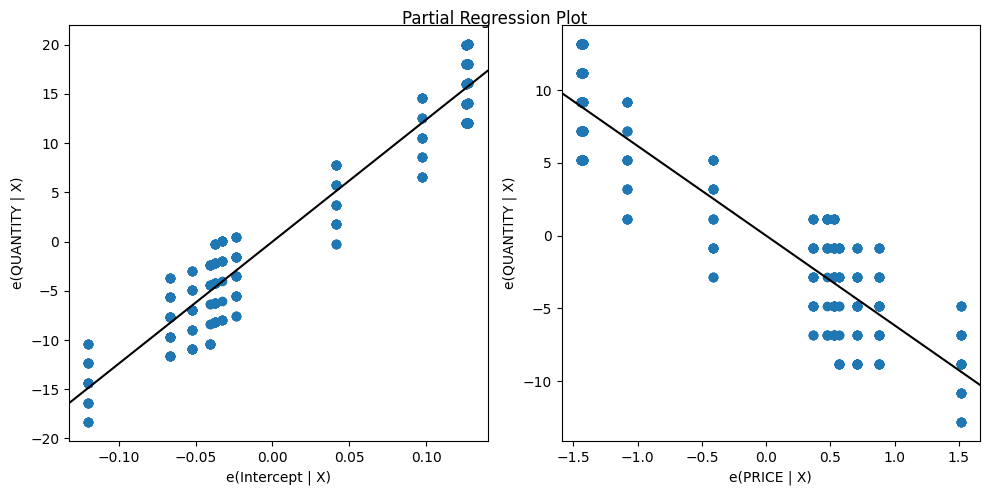

In [40]:
# filtering the transactions with cofee with sell_id 2053
coffee = df_filtered[(df_filtered['ITEM_NAME']=="COFFEE") & (df_filtered['SELL_ID']==2053) & (df_filtered["IS_OUTDOOR"]==1)]
# fitting the model
price_elasticities['cofee'],coffee_model = create_model_and_find_elasticity(coffee)

### 4. Lemonade

Now, we have 2 SELL_ID 2053 and 3055 for burgers

1. 2052 = Lemonade with Burger
3. 3028 = Lemonade alone

We can ignore the sell_id 3028 because it has no transactions as people won't buy lemonade alone in an Burger cafe



The price elasticity of the model is -2.85670298455996


                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     316.5
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           5.32e-53
Time:                        19:37:14   Log-Likelihood:                -1014.7
No. Observations:                 416   AIC:                             2033.
Df Residuals:                     414   BIC:                             2041.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

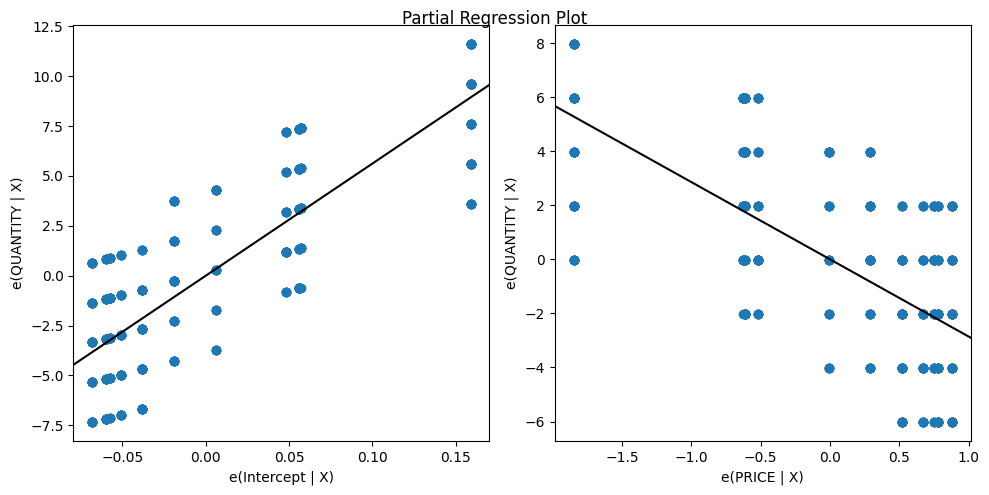

In [31]:
# filtering the transactions with cofee with sell_id 2053
lemonade = df_filtered[(df_filtered['ITEM_NAME']=="LEMONADE") & (df_filtered['SELL_ID']==2052) & (df_filtered["IS_OUTDOOR"]==1)]
# fitting the model
price_elasticities['lemonade'],lemonade_model = create_model_and_find_elasticity(lemonade)

## Finding Optimal price for maximum profit

#### Example : Coke (2051)

coke_profit = (coke_selling_price - coke_buying_price) * (no_of_cokes_sold)

In [32]:
# checking the minimum price of a coke that has been sold so far
coke["PRICE"].min()

10.45

In [33]:
# checking the maximum cost of a coke sold so far
coke['PRICE'].max()

13.41

The lowest price a coke is sold is 10.45 so let's assume the buying price of the coke to be 9 (considering minimum profit of 1 unit when sold at the lowest price)

In [34]:
# assuming the buying price to be 9
buying_price = 9

In [35]:
# fixing the boundaries to search for optimal price
starting_price = 9.5
ending_price = 20

Now let's try various values between starting and ending price to determine which price gives maximum profit

The optimal price for maximum profit is 15.019999999999882




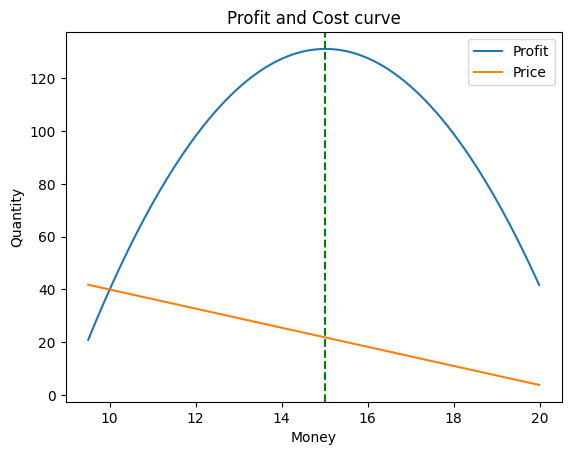

In [44]:
# creating a test dataframe
test = pd.DataFrame(columns=["PRICE","QUANTITY"])

# generating values between 9.5 and 20 in the interval of 0.01 to try out for finding optimal price
test["PRICE"] = np.arange(starting_price,ending_price,0.01)

# predictinig the quantities that will be sold for the given price 
test["QUANTITY"]= coke_2051_model.predict(test["PRICE"])

# computing the profit
test["PROFIT"] = (test["PRICE"]-buying_price)*test["QUANTITY"]

# finding the index of max profit  price yields maximum profit
idx = np.where(test["PROFIT"]==test["PROFIT"].max())

# finding the price which yileds max profit
opt_price = test["PRICE"].loc[idx].values[0]

print(f"The optimal price for maximum profit is {opt_price}\n\n")

plt.plot(test["PRICE"],test["PROFIT"],label="Profit")
plt.plot(test["PRICE"],test["QUANTITY"],label="Price")
plt.xlabel("Money")
plt.ylabel("Quantity")
plt.title("Profit and Cost curve")
plt.legend()
plt.axvline(x=opt_price, color='green', linestyle='--', label=f'Max Profit at Price {opt_price}')
plt.show()


The optimal price for coke_2501 should be 15 but the highest cost that coke_2501 sold is 13.4 therefore the cafe missed the profits that could have been made by optimally setting the cost of coke_2501 as 15

#### All Products 

Let's now write a function to find the optimal price for all products

In [37]:
# defining an empty dictionary for storing optimal prices
optimal_prices ={}

# setting the buying price as 9 for all products
buying_price = 9

# defining the function to calculate the optimal price for all products
def find_optim_price(data,model,buying_price):
    """
    data         : product sales data
    model        : OLS model for respective model
    buying_price : buying price of the product
    
    """
    # finding the starting price for the boundary to search for optimal prices
    starting_price = data["PRICE"].min()-1
    
    # finding the ending price for the boundary to search for optimal prices
    ending_price = data["PRICE"].max()+10
    
    # creating a dataframe 
    test = pd.DataFrame(columns=["PRICE","QUANTITY"])
    
    # generating values between 9.5 and 20 in the interval of 0.01 to try out for finding optimal price
    test["PRICE"] = np.arange(starting_price,ending_price,0.01)
    
    # predictinig the quantities that will be sold for the given price 
    test["QUANTITY"]= model.predict(test["PRICE"])
    
    # computing the profit
    test["PROFIT"] = (test["PRICE"]-buying_price)*test["QUANTITY"]
    
    # finding the index of max profit  price yields maximum profit
    idx = np.where(test["PROFIT"]==test["PROFIT"].max())
    
    # finding the price which yileds max profit
    opt_price = test["PRICE"].loc[idx].values[0]

    # lets plot the price vs profit and price vs quantity  
    plt.plot(test["PRICE"],test["PROFIT"])
    plt.plot(test["PRICE"],test["QUANTITY"])
    plt.axvline(x=opt_price, color='green', linestyle='--', label=f'Max Profit at Price {opt_price}')
    plt.show()

    return opt_price 

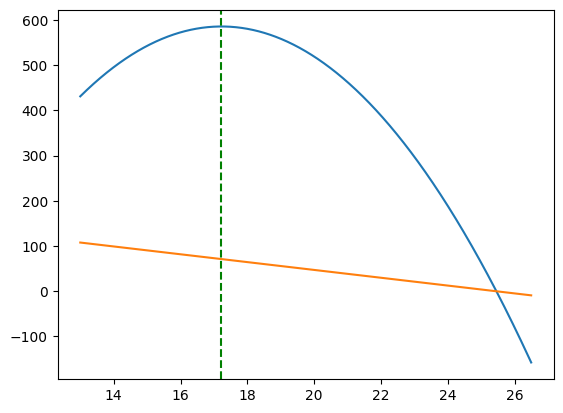

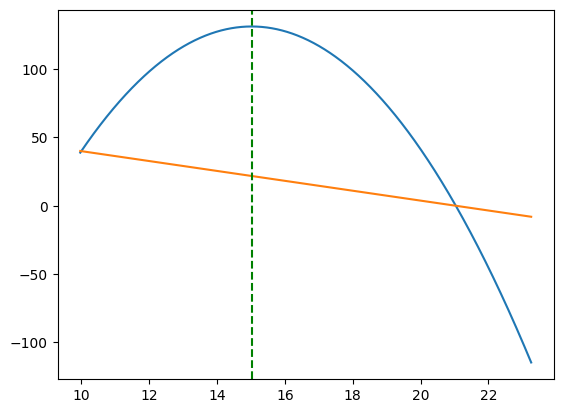

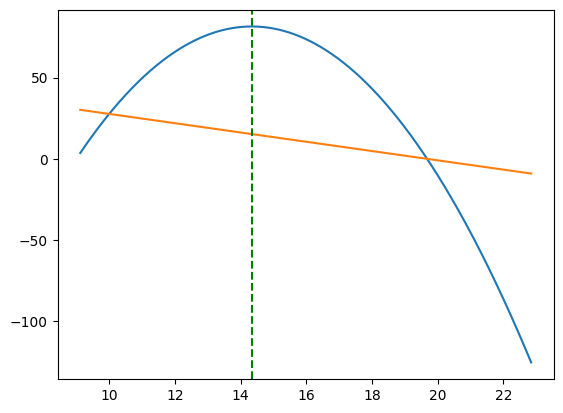

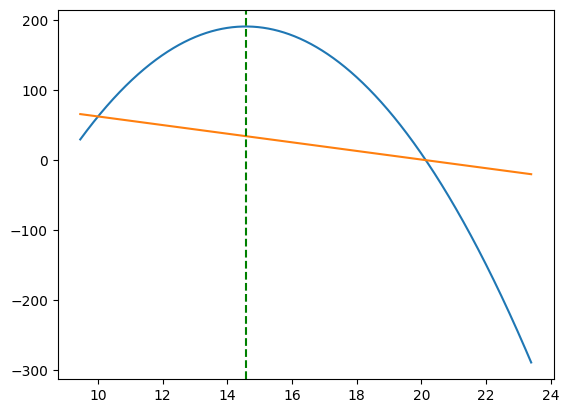

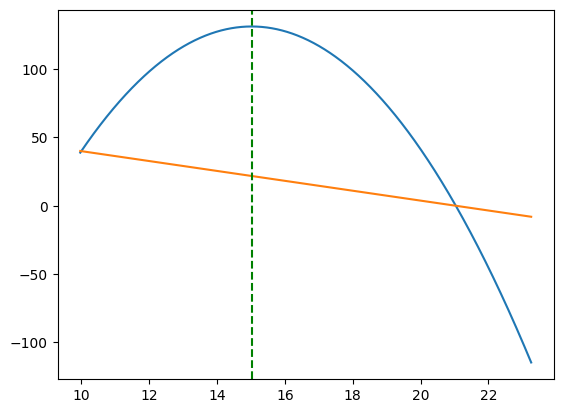

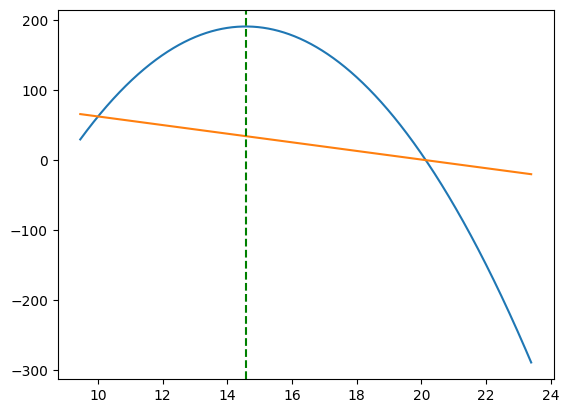

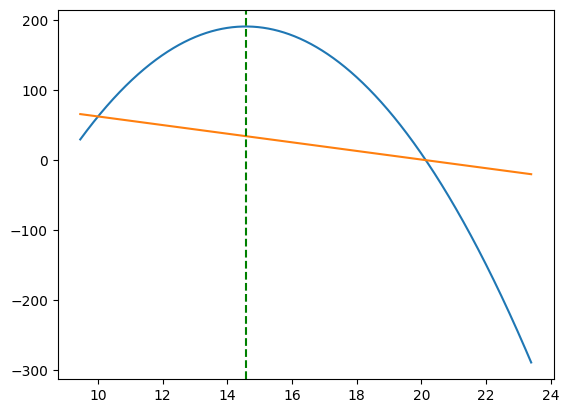

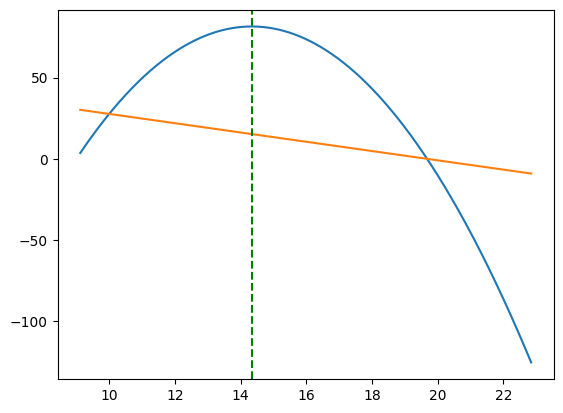

In [38]:
# finding the optimal prices for all products
optimal_prices['burger_1070'] = find_optim_price(burgers_1070_filtered,burger_1070_model,buying_price)
optimal_prices['burger_2051'] = find_optim_price(burgers_2051,burger_2051_model,buying_price)
optimal_prices['burger_2052'] = find_optim_price(burgers_2052,burger_2052_model,buying_price)
optimal_prices['burger_2053'] = find_optim_price(burgers_2053,burger_2053_model,buying_price)

optimal_prices['coke_2051'] = find_optim_price(coke_2051,coke_2051_model,buying_price)
optimal_prices['coke_2053'] = find_optim_price(coke_2053,coke_2053_model,buying_price)

optimal_prices['coffee'] = find_optim_price(coffee,coffee_model,buying_price)
optimal_prices['lemonade'] = find_optim_price(lemonade,lemonade_model,buying_price)

In [39]:
optimal_prices

{'burger_1070': 17.21999999999991,
 'burger_2051': 15.019999999999893,
 'burger_2052': 14.339999999999888,
 'burger_2053': 14.56999999999989,
 'coke_2051': 15.019999999999893,
 'coke_2053': 14.56999999999989,
 'coffee': 14.56999999999989,
 'lemonade': 14.339999999999888}